In [1]:
import numpy as np 
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from scipy.special import boxcox1p
import seaborn as sns

In [2]:
pwd


'C:\\Users\\KIIT'

In [3]:
saletrain=pd.read_csv('sales_train.csv')
submission=pd.read_csv('sample_submission.csv')
item=pd.read_csv("items.csv")
test=pd.read_csv("test.csv")
itemcat=pd.read_csv("item_categories.csv")
shop=pd.read_csv("shops.csv")

In [4]:
item_info= pd.merge(item, itemcat, on='item_category_id', how='inner')
train_1 = pd.merge(saletrain,item_info, on='item_id', how='inner')
train = pd.merge(train_1, shop, on='shop_id', how='inner')
train.head(3)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,16.05.2013,4,59,2573,249.0,1.0,DEL REY LANA Born To Die,55,Музыка - CD локального производства,"Ярославль ТЦ ""Альтаир"""
2,26.01.2013,0,59,2574,399.0,1.0,DEL REY LANA Born To Die The Paradise Editio...,55,Музыка - CD локального производства,"Ярославль ТЦ ""Альтаир"""


In [5]:
test_1 = pd.merge(test,item_info, on='item_id', how='inner')
test = pd.merge(test_1, shop, on='shop_id', how='inner')
test.head(3)

,ID,shop_id,item_id,item_name,item_category_id,item_category_name,shop_name
0,0,5,5037,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,"Вологда ТРЦ ""Мармелад"""
1,1,5,5320,ONE DIRECTION Made In The A.M.,55,Музыка - CD локального производства,"Вологда ТРЦ ""Мармелад"""
2,2,5,5233,"Need for Speed Rivals (Essentials) [PS3, русск...",19,Игры - PS3,"Вологда ТРЦ ""Мармелад"""


In [6]:
train['total_sales'] = train['item_price'] * train['item_cnt_day']
train.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,total_sales
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",999.0
1,16.05.2013,4,59,2573,249.0,1.0,DEL REY LANA Born To Die,55,Музыка - CD локального производства,"Ярославль ТЦ ""Альтаир""",249.0
2,26.01.2013,0,59,2574,399.0,1.0,DEL REY LANA Born To Die The Paradise Editio...,55,Музыка - CD локального производства,"Ярославль ТЦ ""Альтаир""",399.0


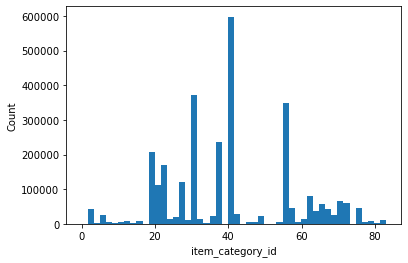

In [7]:
plt.hist(train["item_category_id"],bins=50)
plt.xlabel('item_category_id')
plt.ylabel('Count')
plt.show()

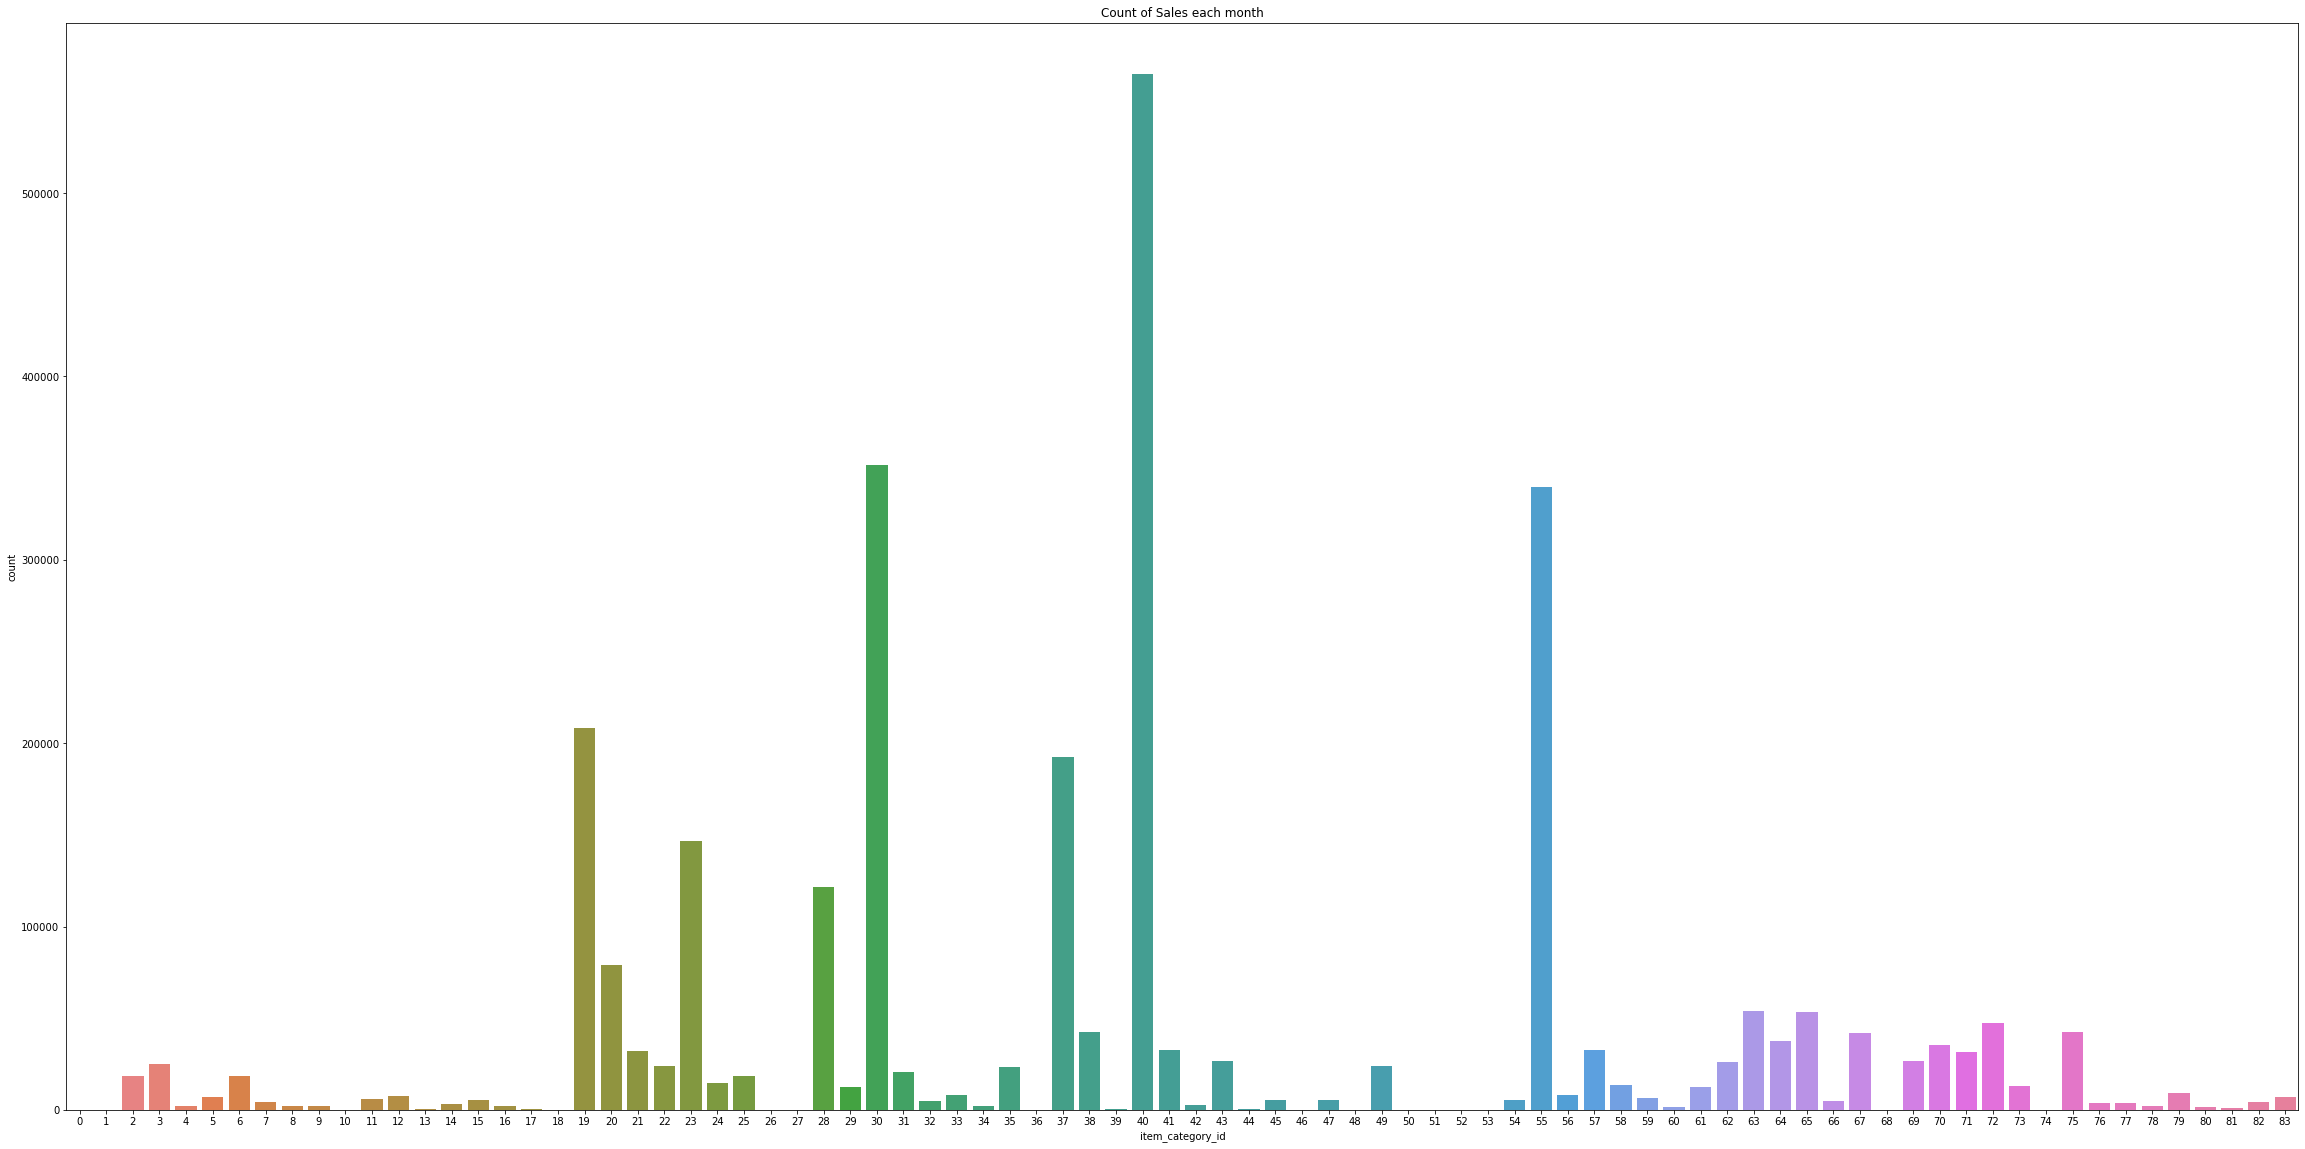

In [8]:
plt.figure(figsize=(40,20))
ax = sns.countplot(x="item_category_id", data=train, palette="husl")
plt.title("Count of Sales each month")
plt.show()

In [9]:
train.sort_values('total_sales',ascending=False)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,total_sales
1032410,29.11.2013,10,42,6675,18118.712871,101.0,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,12,Игровые консоли - PS4,"СПб ТК ""Невский Центр""",1.829990e+06
747196,29.11.2013,10,31,6675,18245.555556,90.0,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,12,Игровые консоли - PS4,"Москва ТЦ ""Семеновский""",1.642100e+06
321933,29.11.2013,10,25,6675,18190.000000,85.0,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,12,Игровые консоли - PS4,"Москва ТРК ""Атриум""",1.546150e+06
2445923,29.11.2013,10,12,6675,18073.690476,84.0,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,12,Игровые консоли - PS4,Интернет-магазин ЧС,1.518190e+06
2260872,29.11.2013,10,18,6675,18305.068493,73.0,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,12,Игровые консоли - PS4,"Красноярск ТЦ ""Июнь""",1.336270e+06
...,...,...,...,...,...,...,...,...,...,...,...
2879300,01.10.2015,33,48,6674,29990.000000,-1.0,Sony PlayStation 4 (1Tb) Black (CUH-1208B),12,Игровые консоли - PS4,"Томск ТРЦ ""Изумрудный Город""",-2.999000e+04
2894608,08.10.2015,33,34,13499,31199.000000,-1.0,Комплект «Sony PS4 (500 Gb) White (CUH-1208A)....,12,Игровые консоли - PS4,"Н.Новгород ТРЦ ""РИО""",-3.119900e+04
462870,06.03.2015,26,6,13401,33490.000000,-1.0,"Комплект ""Microsoft Xbox One 1TB (CoD:AW) + ""...",16,Игровые консоли - XBOX ONE,"Воронеж (Плехановская, 13)",-3.349000e+04
2560025,22.12.2014,23,29,13405,20999.000000,-2.0,"Комплект ""Microsoft Xbox One 500GB (Day One Ed...",16,Игровые консоли - XBOX ONE,"Москва ТЦ ""Новый век"" (Новокосино)",-4.199800e+04


In [10]:
train[["date_block_num","shop_id","item_id","date","item_price","item_cnt_day","total_sales"]].groupby(["date_block_num","shop_id","item_id"])\
            .agg({"date":["min",'max'],"item_price":"mean","item_cnt_day":"sum","total_sales":"sum"})

date             item_price  \
                                       min         max       mean   
date_block_num shop_id item_id                                      
0              0       32       03.01.2013  31.01.2013      221.0   
                       33       03.01.2013  28.01.2013      347.0   
                       35       31.01.2013  31.01.2013      247.0   
                       43       31.01.2013  31.01.2013      221.0   
                       51       13.01.2013  31.01.2013      128.5   
...                                    ...         ...        ...   
33             59      22087    05.10.2015  23.10.2015      119.0   
                       22088    03.10.2015  27.10.2015      119.0   
                       22091    03.10.2015  03.10.2015      179.0   
                       22100    18.10.2015  18.10.2015      629.0   
                       22102    16.10.2015  16.10.2015     1250.0   

                               item_cnt_day total_sales  
                                        sum         sum  
date_block_num shop_id item_id                           
0              0       32               6.0      1326.0  
                       33               3.0      1041.0  
                       35               1.0       247.0  
                       43               1.0       221.0  
                       51               2.0       257.0  
...                                     ...         ...  
33             59      22087            6.0       714.0  
                       22088            2.0       238.0  
                       22091            1.0       179.0  
                       22100            1.0       629.0  
                       22102            1.0      1250.0  

[1609124 rows x 5 columns]

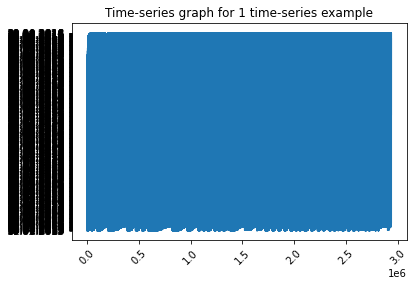

In [11]:
f, ax = plt.subplots(1,1)
ax.plot(train['date'])

# Add title
ax.set_title('Time-series graph for 1 time-series example')

# Rotate x-labels
ax.tick_params(axis = 'x', rotation = 45)

# Show graph
plt.show()
plt.close()

In [12]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(train, date_block_num):
    """
    Test stationarity using moving average statistics and Dickey-Fuller test
    Source: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
    """
    
    # Determing rolling statistics
    rolmean = train[date_block_num].rolling(window = 12, center = False).mean()
    rolstd = train[date_block_num].rolling(window = 12, center = False).std()
    
    # Plot rolling statistics:
    orig = plt.plot(train[date_block_num], 
                    color = 'blue', 
                    label = 'Original')
    mean = plt.plot(rolmean, 
                    color = 'red', 
                    label = 'Rolling Mean')
    std = plt.plot(rolstd, 
                   color = 'black', 
                   label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation for %s' %(date_block_num))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    # Perform Dickey-Fuller test:
    # Null Hypothesis (H_0): time series is not stationary
    # Alternate Hypothesis (H_1): time series is stationary
    print('Results ofTest:')
    traintest = adfuller(train[date_block_num], 
                      autolag='AIC')
    trainoutput = pd.Series(test[0:4], 
                         index = ['Test Statistic',
                                  'p-value',
                                  '# Lags Used',
                                  'Number of Observations Used'])
    for key, value in traintest[4].items():
        trainoutput['Critical Value (%s)'%key] = value
    print(trainoutput)

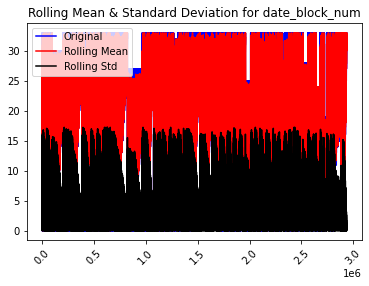

Results ofTest:


MemoryError: Unable to allocate 448. MiB for an array with shape (20, 2935690) and data type float64

In [13]:
test_stationarity(train = train, date_block_num = 'date_block_num')

In [19]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic, kpss
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

In [30]:
def plot_decomposition(train, ts, trend, seasonal, residual):
  """
  Plot time series data
  """
  f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15, 5), sharex = True)

  ax1.plot(train[ts], label = 'Original')
  ax1.legend(loc = 'best')
  ax1.tick_params(axis = 'x', rotation = 45)

  ax2.plot(train[trend], label = 'Trend')
  ax2.legend(loc = 'best')
  ax2.tick_params(axis = 'x', rotation = 45)

  ax3.plot(train[seasonal],label = 'Seasonality')
  ax3.legend(loc = 'best')
  ax3.tick_params(axis = 'x', rotation = 45)

  ax4.plot(train[residual], label = 'Residuals')
  ax4.legend(loc = 'best')
  ax4.tick_params(axis = 'x', rotation = 45)
  plt.tight_layout()

  # Show graph
  plt.suptitle('Trend, Seasonal, and Residual Decomposition of %s' %(ts), 
               x = 0.5, 
               y = 1.05, 
               fontsize = 18)
  plt.show()
  plt.close()
  
  return

<ipython-input-31-68fe26f2aa56>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(train['item_id'], freq = 365)


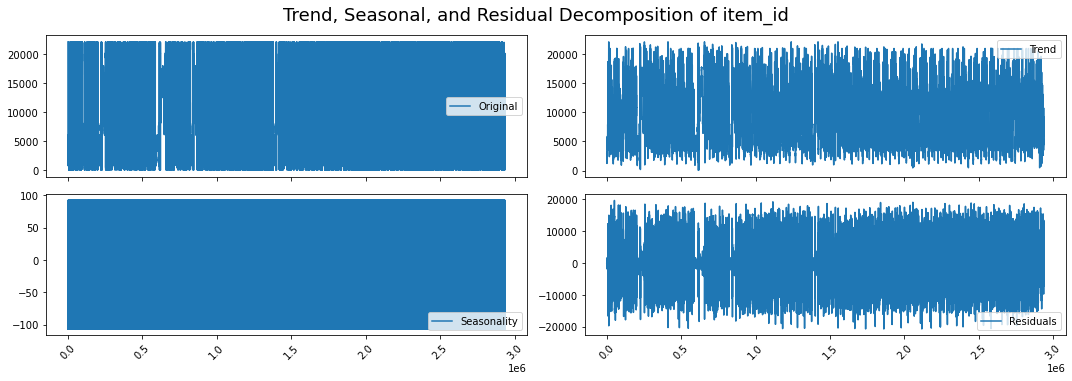

TypeError: test_stationarity() got an unexpected keyword argument 'ts'

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(train['item_id'], freq = 365)

train.loc[:,'trend'] = decomposition.trend
train.loc[:,'seasonal'] = decomposition.seasonal
train.loc[:,'residual'] = decomposition.resid

plot_decomposition(train = train, 
                   ts = 'item_id', 
                   trend = 'trend',
                   seasonal = 'seasonal', 
                   residual = 'residual')

test_stationarity(train = train, ts = 'residual')

In [32]:
from pandas import Series as Series

# to remove trend
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# invert differenced forecast
def inverse_difference(last_ob, value):
    return value + last_ob